# 0. Matplotlib란?
(matplotlib의 기본 개념 훑기)

- matplotlib : 2차원 그래픽 패키지 
- reference : [tutorial](https://wikidocs.net/92082)

## 0) 맛보기

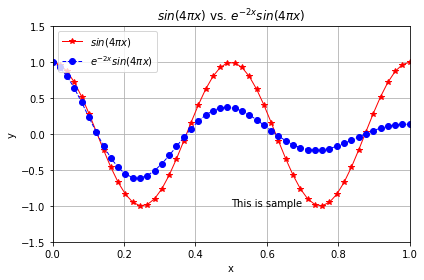

In [54]:
# 꾸미기 예시 
x = np.linspace(0,1,50)

y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

plt.plot(x,y1,'r-*', # `r-*` 색상, 선타입, 마커
         label=r'$sin(4 \pi x)$',lw=1) # label : 레전드에 표시될 내용, lw : linewidth 
plt.plot(x,y2,'b--o',
   label=r'$ e^{-2x} sin(4\pi x) $',lw=1)
plt.title(r'$sin(4 \pi x)$ vs. $ e^{-2x} sin(4\pi x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.text(0.5,-1.0,r'This is sample') # 주어진 x,y 위치에 text 표시 
plt.axis([0,1,-1.5,1.5]) # xmin, xmax, ymin, ymax : 축의 범위 지정 
plt.grid(True) # 격자 그리기 
plt.legend(loc='upper left')
plt.tight_layout() # 여백 조정하기 
plt.show()

In [ ]:
# plt.show() 호출 안해도 됨 
%matplotlib inline 

## 1) Matplotlib의 구동방식 

- Pyplot API : 커맨드 방식 
- 객체지향 API : 객체지향 방식 
    - `FigureCanvas` : 그림을 그릴 영역을 나타내는 객체 
    - `Renderer` : 캔버스(`FigureCanvas`)에 그리는 도구 객체 
    - `Artist` : `Renderer`가 `FigureCanvas`에 어떻게 그릴 것인가를 나타내는 객체 
        - Primitives : `Line2D`, `Rectangle` 등과 같이 캔버스에 그려지는 표준 그래픽 객체 
        - Containers : `Axis`, `Axes`, `Figure` 등과 같이 Primitives가 위치하겔 될 대상 

- 객체지향 방식 : `Figure` 객체 생성하고, 이를 이용해 하나 이상의 `Axes` 객체를 만들고 해당 객체의 헬퍼함수로 primitives를 만드는 것 

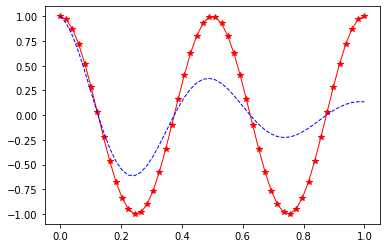

In [57]:
# Pyplot API 커맨드 방식 

x = np.linspace(0,1,50) # 0~1사이의 50개의 값을 1차원으로 생성 
y1 = np.cos(4*np.pi*x)
y2 = np.cos(4*np.pi*x)*np.exp(-2*x)

plt.plot(x,y1,'r-*',lw=1)
plt.plot(x,y2,'b--',lw=1)   

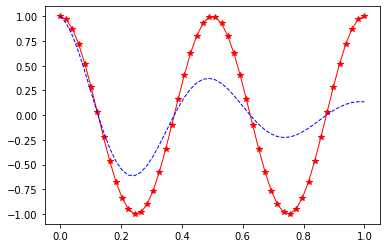

In [58]:
# 객체지향 API 

fig = plt.figure() # figure 객체 생성 
ax = fig.subplots() # axes 생성 
ax.plot(x, y1, 'r-*',lw=1) # 생성된 axes에 대한 plot() 직접 호출 
ax.plot(x, y2,'b--',lw=1) 



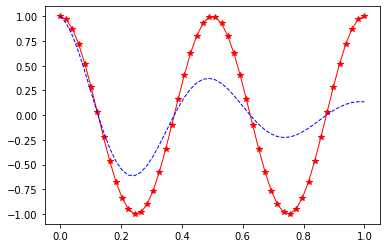

In [59]:
# 위의 둘을 조합해 figure와 axes를 plt.subplots()라는 편의함수로 사용 

fig, ax = plt.subplots() # 한 번에 figure와 axes 객체 리스트 생성
ax.plot(x, y1, 'r-*',lw=1) 
ax.plot(x, y2,'b--',lw=1) 

## 2) Axes와 Axis
- Axes : 그래프가 그려지는 곳  
- Axis : 축 (x, y)


## 3) Subplot을 그리는 방식 

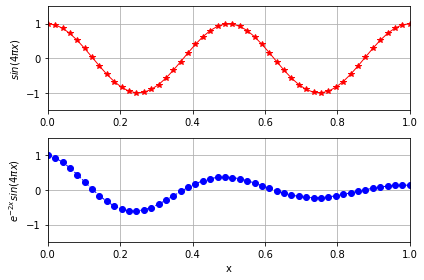

In [68]:
# subplot() 이용 

plt.subplot(2,1,1)
plt.plot(x, y1, 'r-*', lw=1)
plt.grid(True)
plt.ylabel(r'$sin(4 \pi x)$')
plt.axis([0,1,-1.5,1.5])

plt.subplot(2,1,2) # (2,1,1)하면 겹쳐서 그려짐 또는 설정을 안해도 겹쳐서 그려짐
plt.plot(x,y2,'b--o',lw=1)
plt.grid(True)
plt.xlabel('x')
plt.ylabel(r'$ e^{-2x} sin(4\pi x) $')
plt.axis([0,1,-1.5,1.5])

plt.tight_layout()
plt.show()

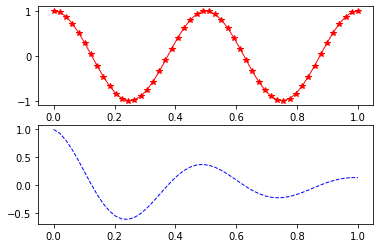

In [66]:
# 객체지향 API 이용 

fig = plt.figure()

ax = fig.add_subplot(2,1,1)
ax.plot(x, y1, 'r-*',lw=1) 

ax = fig.add_subplot(2,1,2)
ax.plot(x, y2,'b--',lw=1) 

plt.show()

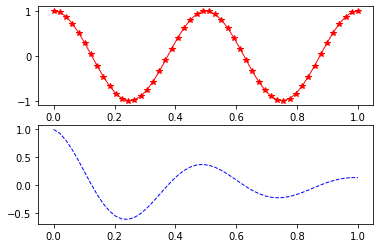

In [69]:
# subplots()를 이용

fig, ax = plt.subplots(2,1)

ax[0].plot(x, y1, 'r-*',lw=1) 
ax[1].plot(x, y2,'b--',lw=1) 

plt.show()

## 4) 2개의 Y축 
- Axes 객체를 X축을 공유하도록 겹치면 된다. 
- `Axes.twinx()`

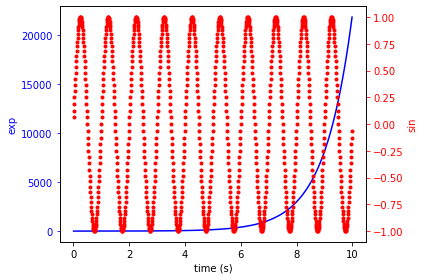

In [70]:
fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# 선의 색이랑 축 색 맞춰주기 
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx() # 여기서 겹치게 설정해줌 
s2 = np.sin(2 * np.pi * t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

## 5) 다양한 도형 그리기 

- `plot()` : 알아서 line2D 객체 생성해서 Axes 객체에 추가 
- `patch` : 도형 객체를 Axes 객체에 추가  


- `gca()`로 현재의 Axes를, `gcf()`로 현재의 Figure 객체를 구할 수 있다. 
- 이 두 함수는 만약 현재의 Axes나 Figure가 없을 경우 새로 생성한다.

In [78]:
import matplotlib.patches as patches
from matplotlib.path import Path

# 이거는 잘 모르겠음 

# 1. Setting 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # Alignments 
'''
girdspec : 전체 figure를 grid로 한 번에 넘겨주는 것..? 
'''

import seaborn as sns 
print(f'Matplotlib Version : {mpl.__version__}')
print(f'Seaborn Version : {sns.__version__}')

Matplotlib Version : 3.3.3
Seaborn Version : 0.11.1


*dpi가 무엇인가?*

1) 고해상도 그래프 그리기 
- matplotlib.pyplot.figure()에서 dpi를 높은 값으로 설정하면 고해상도 그림 그릴 수 있음 
- dpi란? 인치당 도트 수 = 인치당 픽셀 수 
- 기본값 : 100 
- dpi를 늘리면 그림이 확대되어서 잘릴 수 있음 

2) 고해상도 그래프 저장하기 
- matplotlib.pyplot.savefig()에서 dpi를 높은 값으로 설정하면 고해상도 그림 저장할 수 있음 


In [6]:
plt.rcParams['figure.dpi'] = 200

# 2. Alignments 

- `subplots`
- `subplot2grid`
- `add_axes`
- `gridspec, add_subplot`
- `inset_axes`
- `make_axes_locatable`

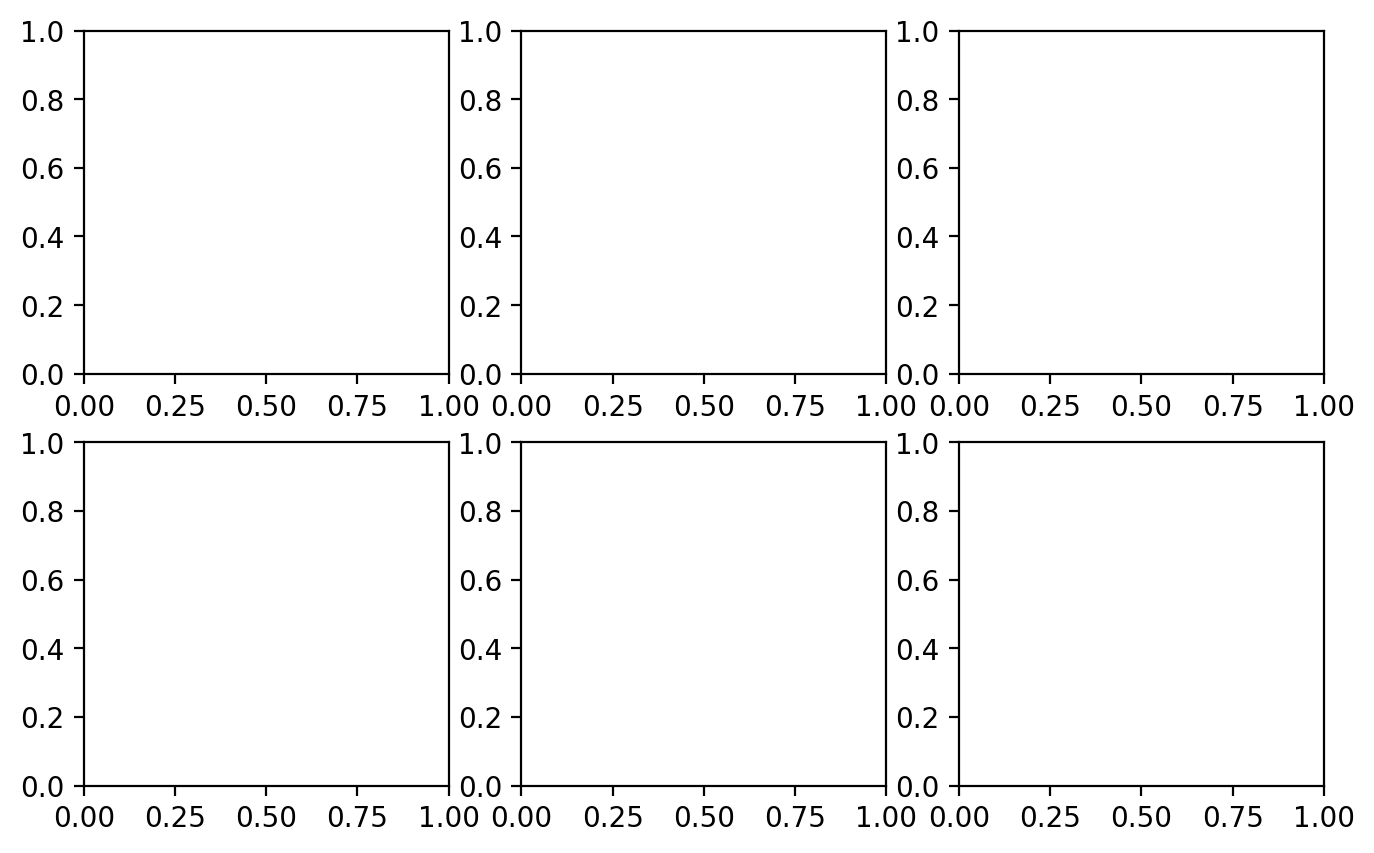

In [7]:
# subplots 
fig, axes = plt.subplots(2,3, figsize = (8,5))
plt.show()

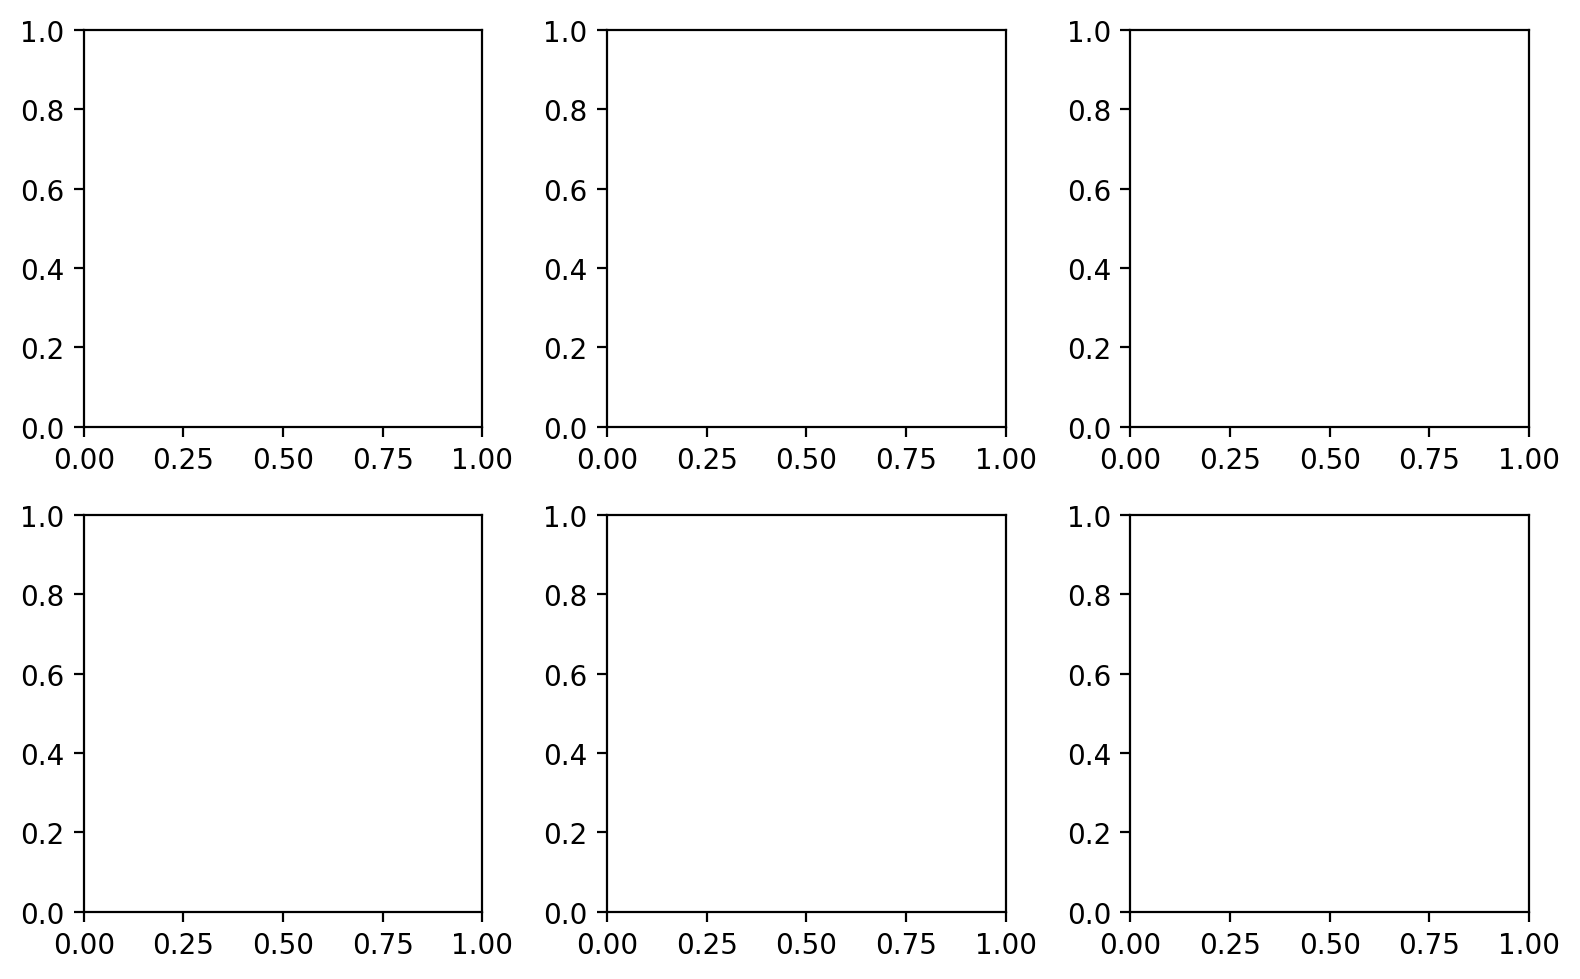

In [9]:
fig, axes = plt.subplots(2,3, figsize = (8,5))
plt.tight_layout() # plot끼리 살짝 거리 두기 
plt.show()

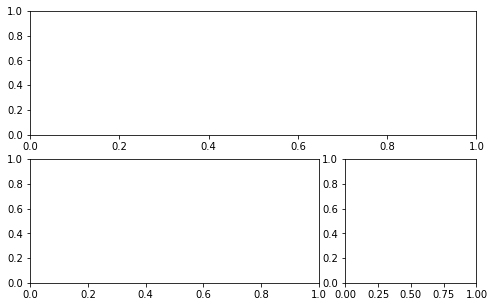

In [13]:
# subplot2grid
fig = plt.figure(figsize = (8,5))

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((2,3), (0,0), colspan = 4) # 3개의 행과 4개의 여로 이루어진 figure라는 의미, colspan은 가로 길이인듯 
ax[1] = plt.subplot2grid((2,3), (1,0), colspan = 2) 
ax[2] = plt.subplot2grid((2,3), (1,2), colspan = 1) 

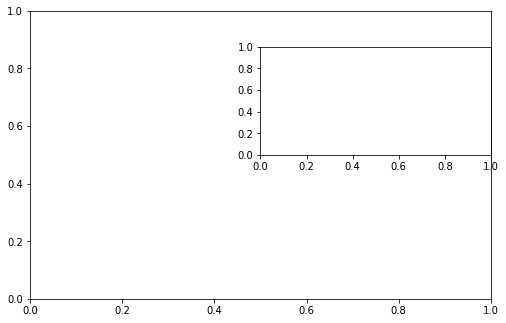

In [25]:
# add_axes
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(3)]


ax[0] = fig.add_axes([0.1,0.1,0.8,0.8]) # x축의 시작위치, y축의 시작위치, x축의 길이, y축의 길이
ax[0] = fig.add_axes([0.5,0.5,0.4,0.3]) # x, y, dx, dy

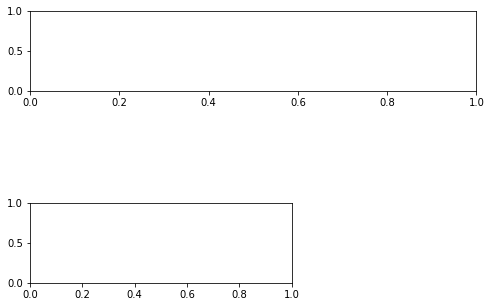

In [28]:
# add_gridspec

fig = plt.figure(figsize=(8,5))

gs = fig.add_gridspec(3,5) # 3X3 grid 생성 

ax = [None for _ in range(2)]

ax[0] = fig.add_subplot(gs[0, :])
ax[1] = fig.add_subplot(gs[2, 0:3])

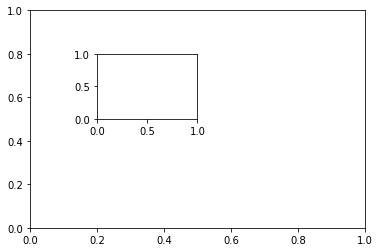

In [31]:
# inset_axes : 추가로 데이터를 표현하기 위해 삽입한 작은 그래프 
fig, ax = plt.subplots()
axin = ax.inset_axes([0.2, 0.5, 0.3, 0.3]) # x0, y0, width, height
plt.show()

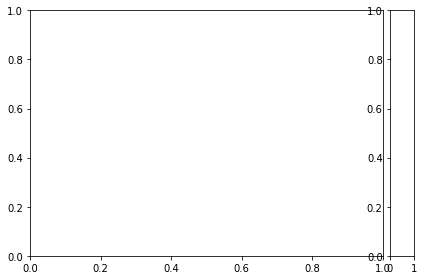

In [37]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1,1)

ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes('right', size = "7%", pad = "2%")

plt.tight_layout()
plt.show()


# 2. Netflix Movie Data

- type : TV show, Movie
- title : 제목 
- director : 감독 
- cast : 캐스팅 목록 
- country : 국가 
- date_added : 추가된 날짜 
- release_year : 배포된 연도 
- rating : 영상물 등급 
- duration : 방영 시간 
- listed_in : 포함된 장르 
- description : 설명 

In [2]:
# 데이터 불러오기 
df_netflix = pd.read_csv("./data/netflix_titles.csv")
df_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [41]:
# 컬럼 확인 
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## 1-1. Understanding what content is available in different countries 

In [50]:
len(df_netflix['country'].unique()) # 682개국의 나라에서 컨텐츠를 생산했음 

682

- movie 개수 상위 10개 나라 시각화 (bar plot)

In [7]:
df_movie = df_netflix[df_netflix['type']=='Movie']
movie_country = df_movie['country'].value_counts()[:10]

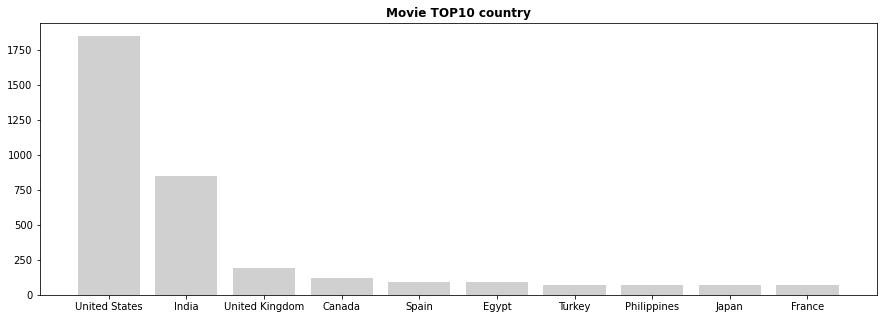

In [67]:
fig, ax= plt.subplots(1,1,figsize = (15,5))

ax.bar(movie_country.index, movie_country, color="#d0d0d0")
ax.set_title(f'Movie TOP10 country', fontweight='bold')

plt.show()

- TV show 개수 상위 10개 나라 시각화

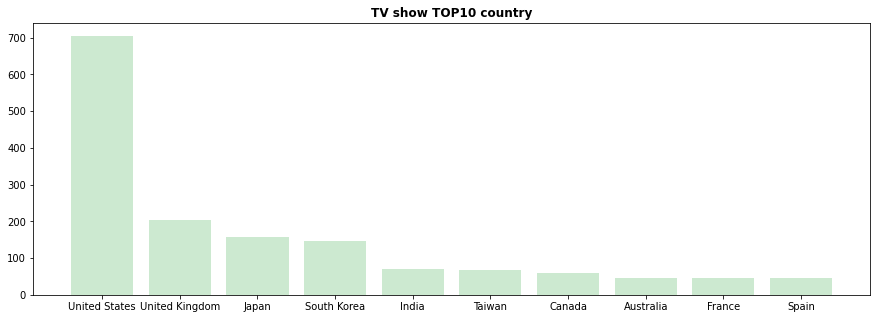

In [8]:
df_tv = df_netflix[df_netflix['type']=='TV Show']
tv_country = df_tv['country'].value_counts()[:10]

fig, ax= plt.subplots(1,1,figsize = (15,5))

ax.bar(tv_country.index, tv_country, color="#CCE9D0")
ax.set_title(f'TV show TOP10 country', fontweight='bold')

plt.show()

영화와 달리, TV show에서는 아시아 국가들이 많이 올라온 것을 볼 수 있다. 

- 1위 국가 : 미국 
- 미국의 영화 및 TV show 등급 분포 시각화 

In [82]:
df_usa = df_movie[df_movie['country']=='United States']
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
usa_rating_movie = df_usa['rating'].value_counts()[rating_order] # 뒤에 리스트 추가로 해당 순서대로 배열 생성됨 

usa_rating_movie


G            29
TV-Y         38
TV-G         41
PG          144
TV-Y7        42
TV-Y7-FV      1
TV-PG       143
PG-13       227
TV-14       200
R           364
NC-17         1
TV-MA       583
Name: rating, dtype: int64

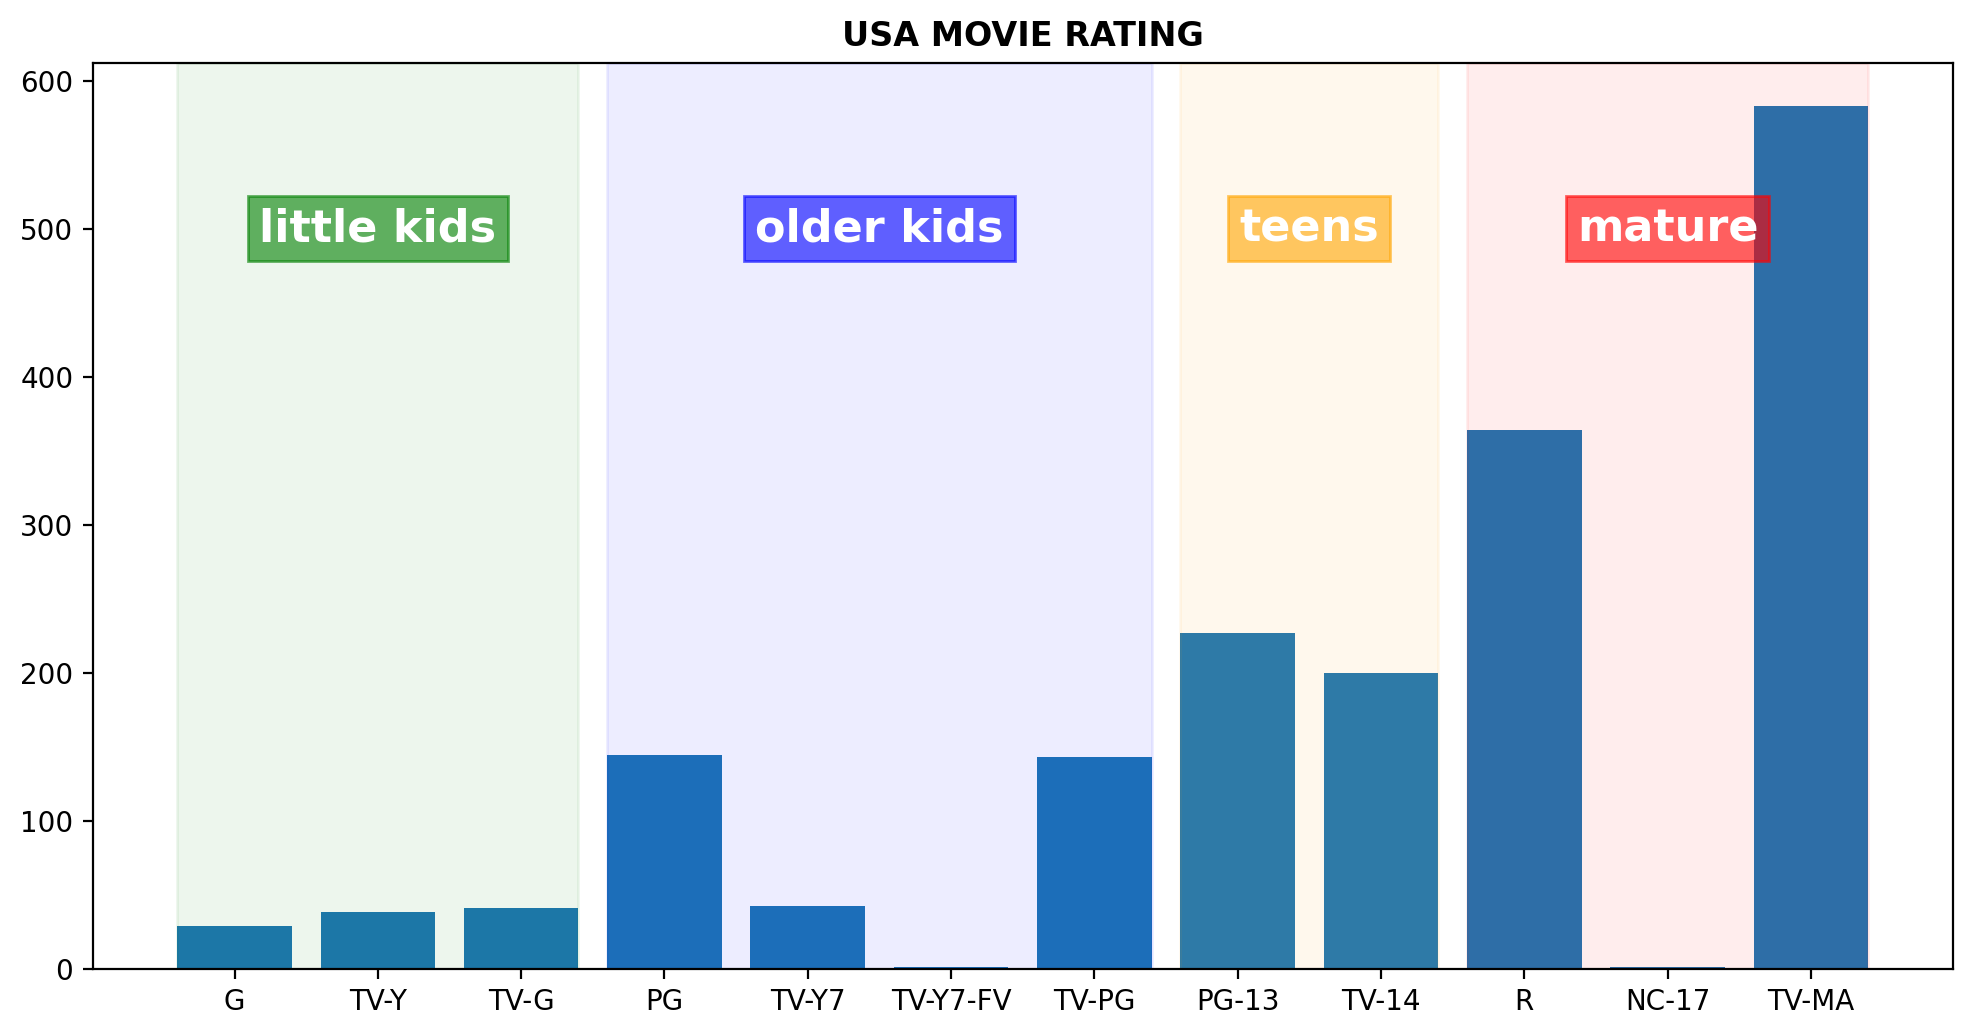

In [84]:
fig, ax = plt.subplots(1,1,figsize = (12,6), dpi = 200)
ax.bar(usa_rating_movie.index, usa_rating_movie)
ax.set_title("USA MOVIE RATING", fontweight = "bold")

# 등급 구간 색 넣기 

color = ['green', 'blue', 'orange', 'red']

span_range = [[0,2], [3,6], [7,8], [9,11]]

for idx, sub_title in enumerate(['little kids', 'older kids', 'teens', 'mature']) : 
    # 주석달기 
    ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2, 500), textcoords = 'offset points', # offset points는 xy(좌표측의 값)부터 xytext offset 위치(단위 point)에 출력
                xytext = (0,0), va = "center", ha="center", color = "w", fontsize=16, fontweight = "bold",
                bbox = dict(color = color[idx], alpha = 0.6)) #alpha는 투명도 

    ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color = color[idx], alpha = 0.07)
plt.show()

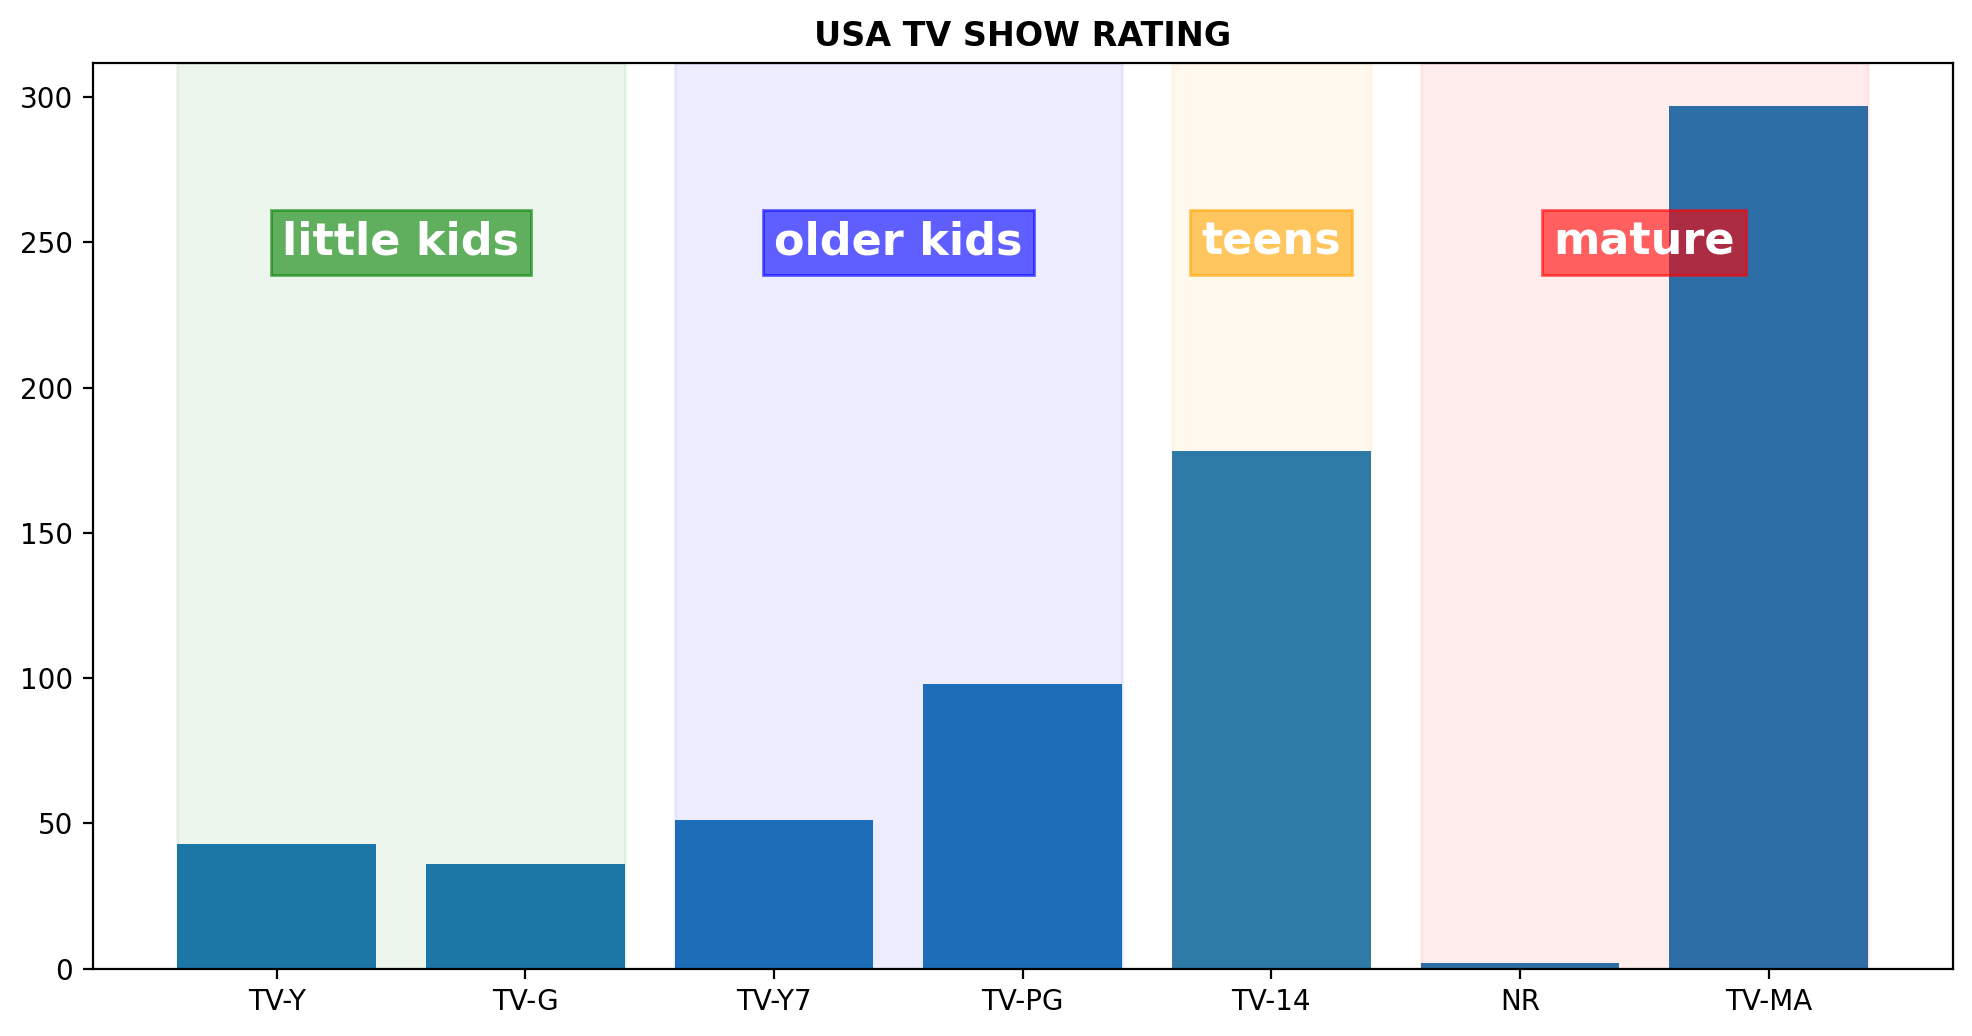

In [94]:
df_usa = df_tv[df_tv['country']=='United States']
rating_order = ['TV-Y', 'TV-G', 'TV-Y7', 'TV-PG', 'TV-14', 'NR', 'TV-MA']
usa_rating_tv = df_usa['rating'].value_counts()[rating_order]


fig, ax = plt.subplots(1,1,figsize = (12,6), dpi = 200)
ax.bar(usa_rating_tv.index, usa_rating_tv)
ax.set_title("USA TV SHOW RATING", fontweight = "bold")

# 등급 구간 색 넣기 

color = ['green', 'blue', 'orange', 'red']

span_range = [[0,1], [2,3], [4,4], [5,6]]

for idx, sub_title in enumerate(['little kids', 'older kids', 'teens', 'mature']) : 
    # 주석달기 
    ax.annotate(sub_title,
                xy=(sum(span_range[idx])/2, 250), textcoords = 'offset points', # offset points는 xy(좌표측의 값)부터 xytext offset 위치(단위 point)에 출력
                xytext = (0,0), va = "center", ha="center", color = "w", fontsize=16, fontweight = "bold",
                bbox = dict(color = color[idx], alpha = 0.6)) #alpha는 투명도 

    ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color = color[idx], alpha = 0.07)
plt.show()

- 연도 별 상위 10개 나라의 영화 수 (line plot)

In [13]:
movie_top10 = df_movie['country'].value_counts()[:10].index
tv_top10 = df_tv['country'].value_counts()[:10].index

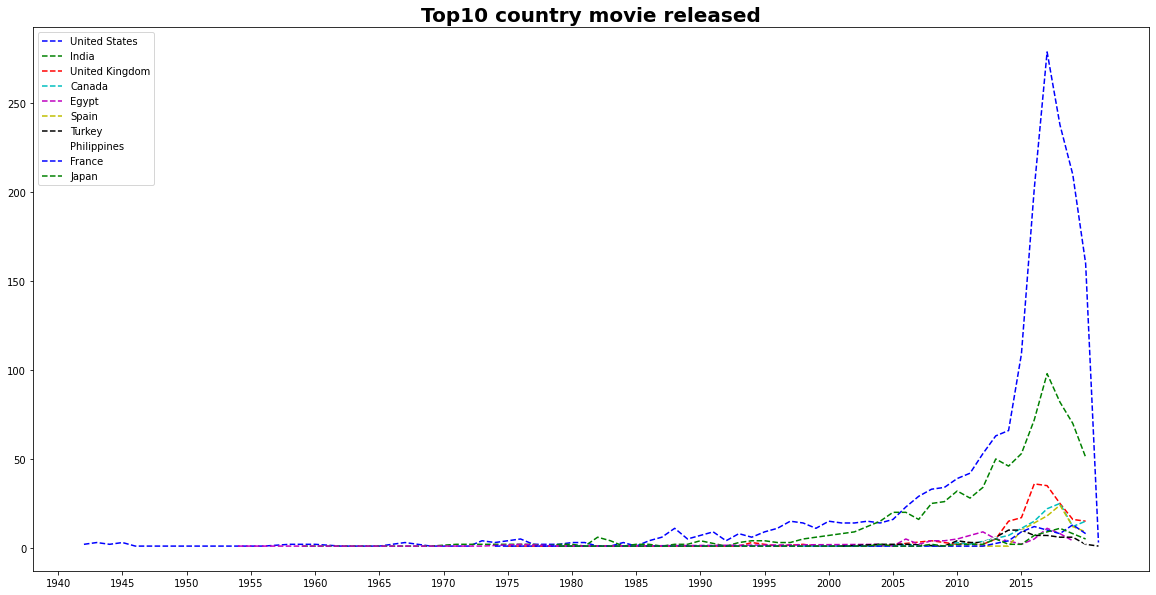

In [82]:
fig, ax = plt.subplots(figsize = (20,10))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g']
for i in range(len(movie_top10)) : 
    li = df_movie[df_movie['country'] == movie_top10[i]]['release_year'].value_counts()
    li.sort_index(inplace = True)
    ax.plot(li, f'{color[i]}--', label = movie_top10[i])
    ax.legend()

plt.title('Top10 country movie released', fontdict={'weight' : 'bold', 'size' : 20})
plt.xticks(np.arange(1940,2020,5)) # x축 눈금 간격 정함 
plt.show()




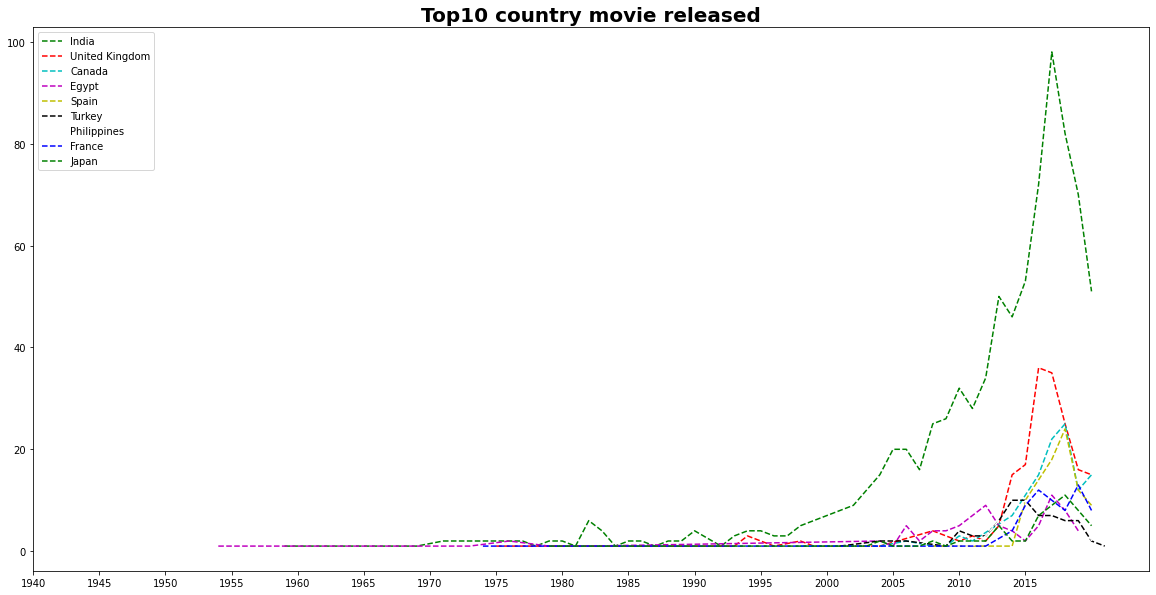

In [85]:
# 미국 빼고 그려보기
fig, ax = plt.subplots(figsize = (20,10))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g']
for i in range(1,len(movie_top10)) : 
    li = df_movie[df_movie['country'] == movie_top10[i]]['release_year'].value_counts()
    li.sort_index(inplace = True)
    ax.plot(li, f'{color[i]}--', label = movie_top10[i])
    ax.legend()

plt.title('Top10 country movie released', fontdict={'weight' : 'bold', 'size' : 20})
plt.xticks(np.arange(1940,2020,5)) # x축 눈금 간격 정함 
plt.show()

title 달 때, plt에 다는 것과 ax에 다는 것의 차이점이 궁금함 

-> figure랑 ax의 차이점 검색하다가 matplotlib의 기본을 정리한 블로그 찾음 

-> [Matplotlib란](https://wikidocs.net/14603) => 0.Matplotlib로

-> [Matplotlib docs](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

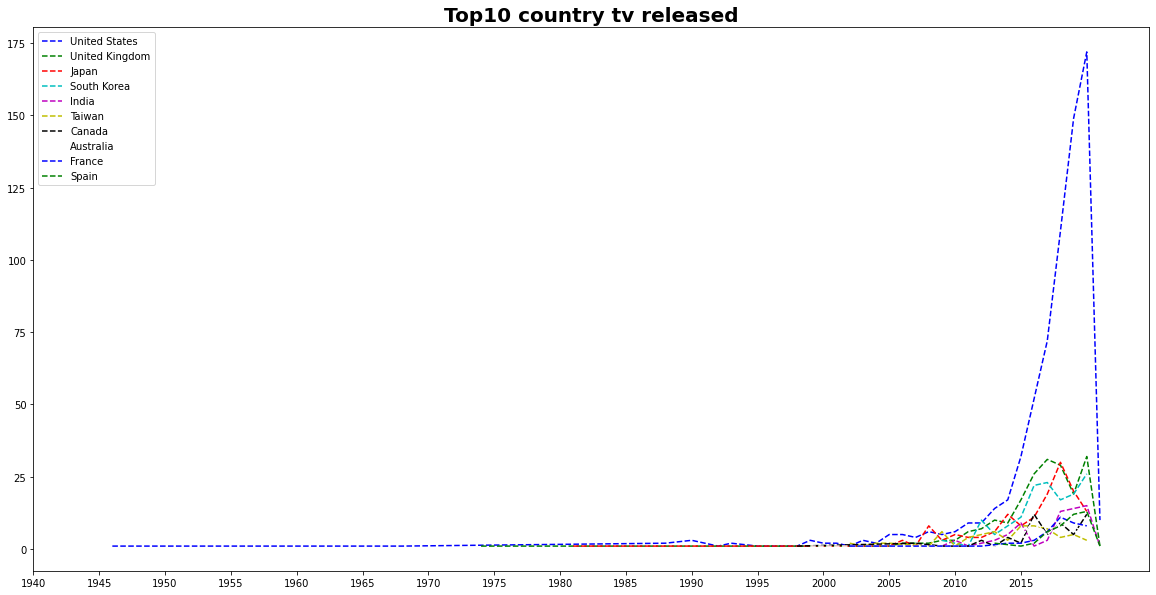

In [84]:
fig, ax = plt.subplots(figsize = (20,10))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g']
for i in range(len(tv_top10)) : 
    li = df_tv[df_tv['country'] == tv_top10[i]]['release_year'].value_counts()
    li.sort_index(inplace = True)
    ax.plot(li, f'{color[i]}--', label = tv_top10[i])
    ax.legend()

plt.title('Top10 country tv released', fontdict={'weight' : 'bold', 'size' : 20})
plt.xticks(np.arange(1940,2020,5)) # x축 눈금 간격 정함 
plt.show()

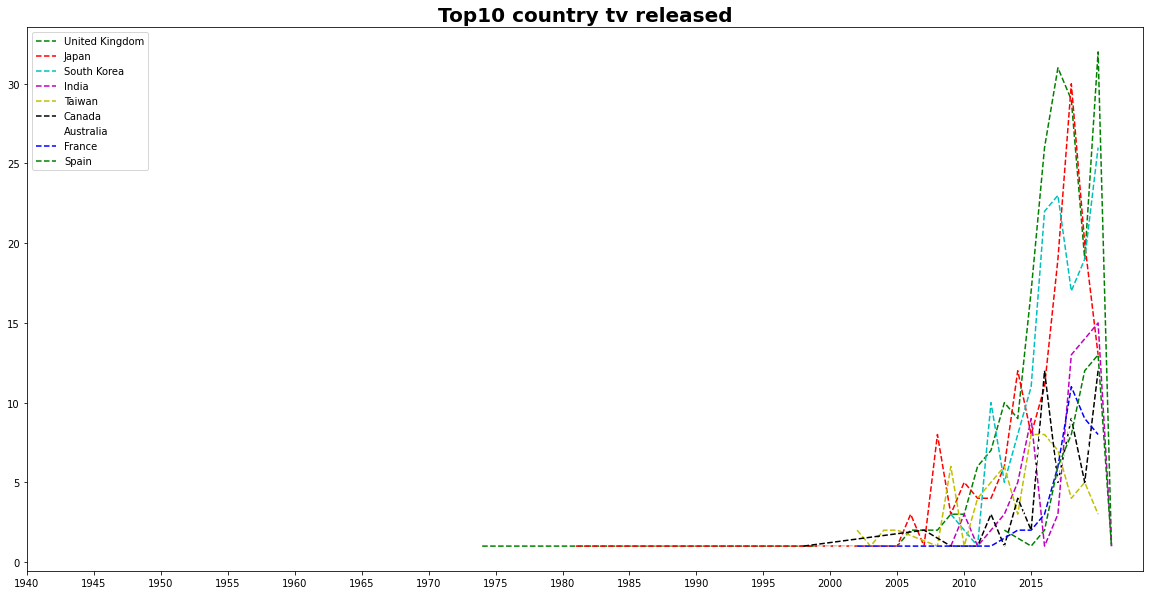

In [88]:
# 미국 빼고 그려보기 
fig, ax = plt.subplots(figsize = (20,10))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g']
for i in range(1, len(tv_top10)) : 
    li = df_tv[df_tv['country'] == tv_top10[i]]['release_year'].value_counts()
    li.sort_index(inplace = True)
    ax.plot(li, f'{color[i]}--', label = tv_top10[i])
    ax.legend()

plt.title('Top10 country tv released', fontdict={'weight' : 'bold', 'size' : 20})
plt.xticks(np.arange(1940,2020,5)) # x축 눈금 간격 정함 
plt.show()

영화와 달리, TV show는 미국을 제외한 상위 4위 국가의 컨텐츠 수의 차이가 크지 않음을 알 수 있다.
 
또한 대부분의 국가에서는 해가 지날수록 등록된 컨텐츠의 수가 증가하는 경향을 보인다.

- 상위 10개 나라의 영화 장르 비율 (pie chart)

In [125]:
# 1위 국가 미국의 영화 컨텐츠 장르 비율 알아보기 
usa_movie_genres = list(df_movie[df_movie['country']=='United States']['listed_in'])
result = []
for i in usa_movie_genres : 
    for j in i.split(",") :
        result.append(j.strip()) 

df_mov_gen = pd.DataFrame({'genres' : result})

In [141]:
df_mov_gen_cnt = df_mov_gen.groupby('genres').size().sort_values(ascending= False)
df_mov_gen_cnt

genres
Dramas                      517
Comedies                    458
Documentaries               381
Independent Movies          284
Children & Family Movies    252
Stand-Up Comedy             211
Action & Adventure          196
Thrillers                   168
Romantic Movies             147
Horror Movies               126
Sci-Fi & Fantasy            101
Music & Musicals            100
Sports Movies                82
Classic Movies               53
LGBTQ Movies                 52
Cult Movies                  32
Faith & Spirituality         28
Movies                       22
International Movies         17
Anime Features                1
dtype: int64

In [ ]:
df_mov_gen_ratio = df_mov_gen_cnt/sum(df_mov_gen_cnt)

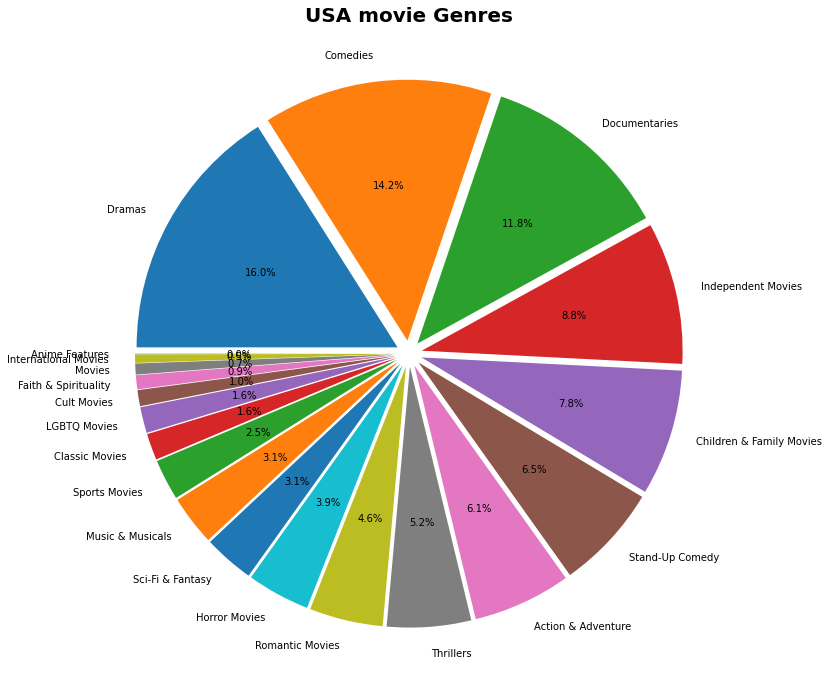

In [185]:
explode= [0.05]*len(df_mov_gen_ratio) # 중심에서 떨어지는 정도 

fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.pie(df_mov_gen_ratio, labels = df_mov_gen_ratio.index, autopct='%.1f%%',
startangle= 180, counterclock= False # 시작 각도, 반시계방향 false 
, explode= explode
) 
fig.set_facecolor((1.,1.,1.))
plt.title('USA movie Genres', fontdict={'weight' : 'bold', 'size' : 20})
plt.show()

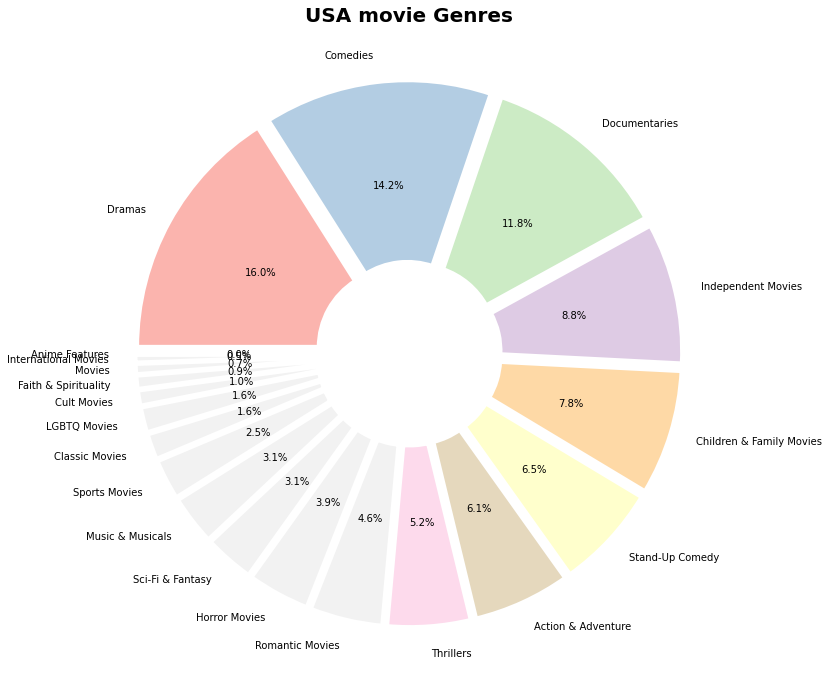

In [183]:
# 부채꼴로 그리기 
explode= [0.05]*len(df_mov_gen_ratio) # 중심에서 떨어지는 정도 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} # 부채꼴 스타일 지정하기
colors = [plt.cm.Pastel1(i) for i in range(len(df_mov_gen_ratio))] # 색 채우기 



fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.pie(df_mov_gen_ratio, labels = df_mov_gen_ratio.index, autopct='%.1f%%', # 서식 지정자 %.자릿수f%숫자
startangle= 180, counterclock= False # 시작 각도, 반시계방향 false 
, explode= explode, wedgeprops= wedgeprops, colors = colors
) 
fig.set_facecolor((1.,1.,1.))
plt.title('USA movie Genres', fontdict={'weight' : 'bold', 'size' : 20})
plt.show()

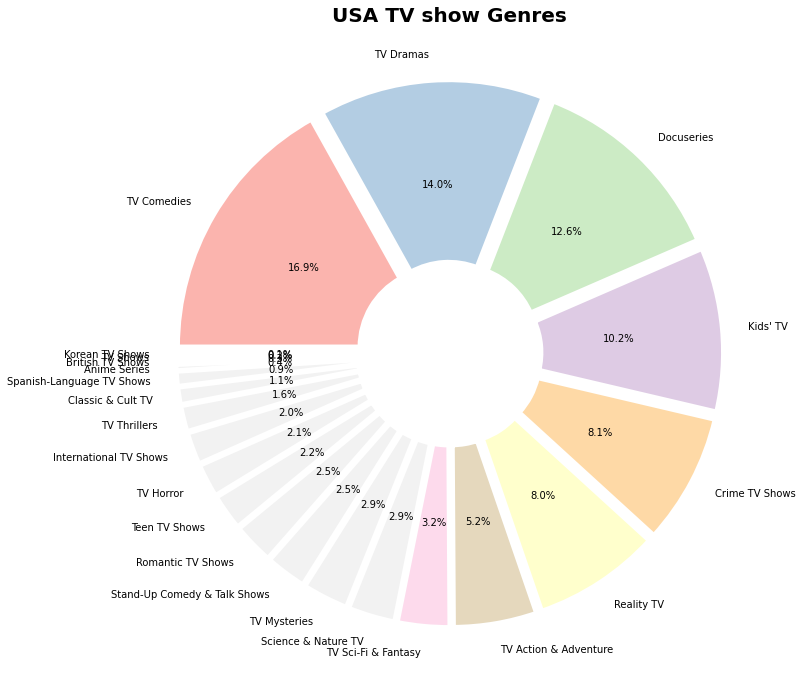

In [186]:
# 1위 국가 미국의 영화 컨텐츠 장르 비율 알아보기 
usa_tv_genres = list(df_tv[df_tv['country']=='United States']['listed_in'])
result = []
for i in usa_tv_genres : 
    for j in i.split(",") :
        result.append(j.strip()) 

df_tv_gen = pd.DataFrame({'genres' : result})
df_tv_gen_cnt = df_tv_gen.groupby('genres').size().sort_values(ascending= False)

df_tv_gen_ratio = df_tv_gen_cnt/sum(df_tv_gen_cnt)


# 부채꼴로 그리기 
explode= [0.05]*len(df_tv_gen_ratio) # 중심에서 떨어지는 정도 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} # 부채꼴 스타일 지정하기
colors = [plt.cm.Pastel1(i) for i in range(len(df_tv_gen_ratio))] # 색 채우기 



fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.pie(df_tv_gen_ratio, labels = df_tv_gen_ratio.index, autopct='%.1f%%', # 서식 지정자 %.자릿수f%숫자
startangle= 180, counterclock= False # 시작 각도, 반시계방향 false 
, explode= explode, wedgeprops= wedgeprops, colors = colors
) 
fig.set_facecolor((1.,1.,1.))
plt.title('USA TV show Genres', fontdict={'weight' : 'bold', 'size' : 20})
plt.show()


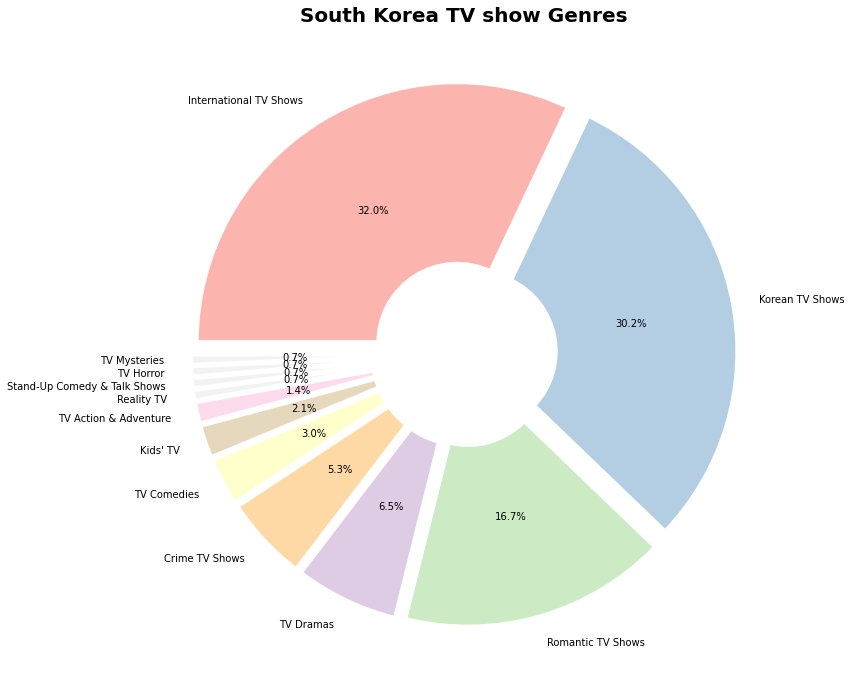

In [189]:
# 한국의 TV 컨텐츠 장르 비율 알아보기 
ko_tv_genres = list(df_tv[df_tv['country']=='South Korea']['listed_in'])
result = []
for i in ko_tv_genres : 
    for j in i.split(",") :
        result.append(j.strip()) 

df_tv_gen = pd.DataFrame({'genres' : result})
df_tv_gen_cnt = df_tv_gen.groupby('genres').size().sort_values(ascending= False)

df_tv_gen_ratio = df_tv_gen_cnt/sum(df_tv_gen_cnt)


# 부채꼴로 그리기 
explode= [0.05]*len(df_tv_gen_ratio) # 중심에서 떨어지는 정도 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} # 부채꼴 스타일 지정하기
colors = [plt.cm.Pastel1(i) for i in range(len(df_tv_gen_ratio))] # 색 채우기 



fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.pie(df_tv_gen_ratio, labels = df_tv_gen_ratio.index, autopct='%.1f%%', # 서식 지정자 %.자릿수f%숫자
startangle= 180, counterclock= False # 시작 각도, 반시계방향 false 
, explode= explode, wedgeprops= wedgeprops, colors = colors
) 
fig.set_facecolor((1.,1.,1.))
plt.title('South Korea TV show Genres', fontdict={'weight' : 'bold', 'size' : 20})
plt.show()